<a href="https://colab.research.google.com/github/NguyenDacCuong2604/ML/blob/main/Lab_7_20130215_NguyenDacCuong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [ ]:
# code
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
#code
data = datasets.load_iris()
clf = svm.SVC(kernel='sigmoid', random_state=0)
scores = cross_validate(clf, data.data, data.target, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['fit_time']))
print(np.mean(scores['score_time']))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.0017585515975952148
0.0005023479461669922
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFromModel

In [ ]:
#code
data = datasets.load_iris()
clf_randomforest=RandomForestClassifier(n_estimators=100)
clf_randomforest.fit(data.data ,data.target)
#importances
importances = clf_randomforest.feature_importances_
#sort
sorted_idx = np.argsort(importances)[::-1]
#print rank
for idx in sorted_idx:
    print(f"{importances[idx]}")

0.449595323597801
0.4221260398119731
0.10397910888853651
0.024299527701689267


In [ ]:
data = datasets.load_iris()
sfm = SelectFromModel(clf_randomforest, threshold=0.1)
X = sfm.fit_transform(data.data, data.target)

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
clf_randomforest=RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clf_randomforest, X, data.target, scoring='accuracy', cv=cv)
print(scores.mean())


0.9466666666666667


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [ ]:
# importing libraries
from sklearn.cluster import KMeans
from sklearn import datasets

In [ ]:
# code
mnist = datasets.load_digits()

In [ ]:
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state = 0)
kmeans.fit(mnist.data)
clusters = kmeans.predict(mnist.data)
scores = cross_val_score(kmeans, mnist.data, mnist.target, cv=5, scoring='accuracy')
print("K-means clustering accuracy:", scores.mean())

# Compute precision, recall, and f1 scores
precision = precision_score(mnist.target, clusters, average='weighted', zero_division=1)
recall = recall_score(mnist.target, clusters, average='weighted')
f1 = f1_score(mnist.target, clusters, average='weighted')

print("K-means clustering precision:", precision)
print("K-means clustering recall:", recall)
print("K-means clustering f1-score:", f1)

K-means clustering accuracy: 0.07512999071494894
K-means clustering precision: 0.013558735694097473
K-means clustering recall: 0.015581524763494713
K-means clustering f1-score: 0.014297035101996054


In [ ]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score

In [ ]:
labels = np.zeros_like(clusters)
for i in range(3):
 mask = (clusters == i)
 #print(mask)
 labels[mask] = mode(mnist.target[mask])[0]
 #print(labels[mask])
accuracy_score(mnist.target, labels)

<ipython-input-48-a976fddd71ac>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(mnist.target[mask])[0]


0.37340011129660544

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [ ]:
# code

*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [ ]:
#code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [ ]:
dataSet = pd.read_csv("shopping-data.csv")
print(dataSet.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
dataSet = dataSet.drop('CustomerID', axis=1)
dataSet = dataSet.drop('Genre', axis=1)
print(dataSet.head())

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


In [ ]:
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, random_state = 0)
kmeans.fit(dataSet)
clusters = kmeans.predict(dataSet)
kmeans.cluster_centers_.shape

(8, 3)

In [ ]:
import matplotlib.pyplot as plt

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

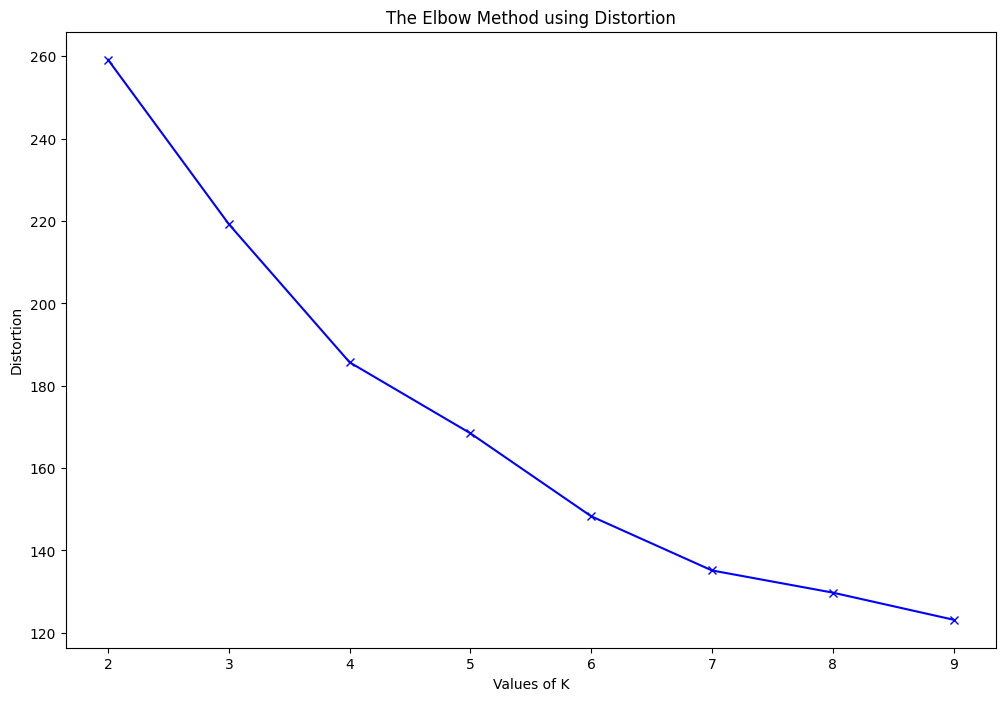

In [ ]:
from scipy.spatial.distance import cdist
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataSet)
#code
sse = []
for k in range(2, 10):
 kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 kmeans.fit(scaled_features)
 # 2.1. Khoảng cách tới toàn bộ centroids
 d2centroids = cdist(scaled_features, kmeans.cluster_centers_, 'euclidean') # shape (n, k)
 # 2.2. Khoảng cách tới centroid gần nhất
 min_distance = np.min(d2centroids, axis=1) # shape (n)
 loss = np.sum(min_distance)
 sse.append(loss)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(2, 10), sse, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
#Điểm khuỷ tay là điểm mà ở đó tốc độ suy giảm của hàm biến dạng sẽ thay đổi nhiều nhất.
#Sử dụng Elbow để tính k cụm, giá trị best k là điểm khuỷa tay.
print("best K là 4")

best K là 4


*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [ ]:
#code
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, memory=None,connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None,compute_distances=False)
cluster.fit_predict(scaled_features)
# get clustering labels
cluster.labels_



array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       1, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

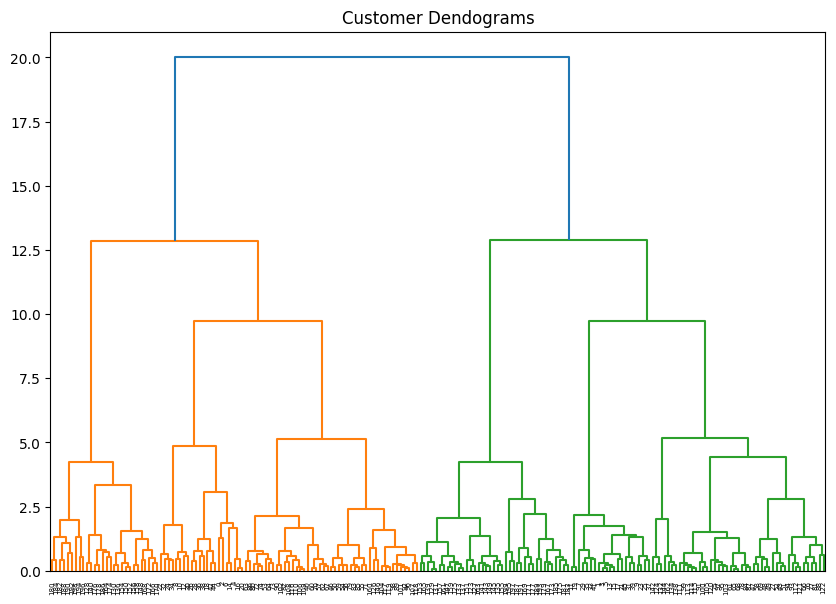

In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(scaled_features, method='ward'))

#Finally,
Save a copy in your Github. Remember renaming the notebook.